# Modeling

In [1]:
from datetime import datetime
start_time = datetime.now()

import pandas as pd
import xgboost as xgb
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
import gc
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
%%time
vars = pd.read_csv('vars_final.csv')
print(vars.shape)
vars.head()

(96397, 32)
CPU times: total: 188 ms
Wall time: 201 ms


,card_zip_total_14,card_zip3_max_30,card_zip_total_3,Merchnum_desc_total_0,zip3_max_3,Card_Merchnum_desc_total_1,zip3_total_1,Cardnum_total_0,card_zip3_max_3,card_merch_total_7,...,card_zip3_variability_max_7,merch_zip_avg_3,Card_Merchdesc_total_3,Merchnum_avg_1,card_zip3_max_14,merch_zip_max_1,card_merch_variability_max_3,card_merch_total_3,Recnum,Fraud
0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,0.0,3.62,3.62,3.62,3.62,3.62,0.0,3.62,1,0
1,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,...,0.0,31.42,31.42,31.42,31.42,31.42,0.0,31.42,2,0
2,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,...,0.0,178.49,178.49,178.49,178.49,178.49,0.0,178.49,3,0
3,3.62,3.62,3.62,3.62,3.62,3.62,7.24,3.62,3.62,3.62,...,0.0,3.62,3.62,3.62,3.62,3.62,0.0,3.62,4,0
4,7.24,3.62,7.24,7.24,3.62,7.24,10.86,7.24,3.62,7.24,...,0.0,3.62,7.24,3.62,3.62,3.62,0.0,7.24,5,0


In [3]:
# set the number of variables desired here, and set the names of the y and record number properly
NVARS = 10

vars.rename(columns={'record':'Recnum'},inplace=True)
vars.rename(columns={'fraud_label':'Fraud'},inplace=True)
numvars = min(NVARS,len(vars)-2)
final_vars_list = ['Recnum','Fraud']
for i in range(numvars):
    final_vars_list.append(vars.columns[i])
    
final_vars_list

['Recnum',
 'Fraud',
 'card_zip_total_14',
 'card_zip3_max_30',
 'card_zip_total_3',
 'Merchnum_desc_total_0',
 'zip3_max_3',
 'Card_Merchnum_desc_total_1',
 'zip3_total_1',
 'Cardnum_total_0',
 'card_zip3_max_3',
 'card_merch_total_7']

In [4]:
vars = vars.filter(final_vars_list,axis=1)
vars.head()

,Recnum,Fraud,card_zip_total_14,card_zip3_max_30,card_zip_total_3,Merchnum_desc_total_0,zip3_max_3,Card_Merchnum_desc_total_1,zip3_total_1,Cardnum_total_0,card_zip3_max_3,card_merch_total_7
0,1,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
1,2,0,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42
2,3,0,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49
3,4,0,3.62,3.62,3.62,3.62,3.62,3.62,7.24,3.62,3.62,3.62
4,5,0,7.24,3.62,7.24,7.24,3.62,7.24,10.86,7.24,3.62,7.24


In [5]:
vars.shape

(96397, 12)

In [6]:
vars['Fraud'].sum()

1059

In [7]:
vars.head(10)

,Recnum,Fraud,card_zip_total_14,card_zip3_max_30,card_zip_total_3,Merchnum_desc_total_0,zip3_max_3,Card_Merchnum_desc_total_1,zip3_total_1,Cardnum_total_0,card_zip3_max_3,card_merch_total_7
0,1,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
1,2,0,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42
2,3,0,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49
3,4,0,3.62,3.62,3.62,3.62,3.62,3.62,7.24,3.62,3.62,3.62
4,5,0,7.24,3.62,7.24,7.24,3.62,7.24,10.86,7.24,3.62,7.24
5,6,0,3.67,3.67,3.67,3.67,3.67,3.67,14.53,3.67,3.67,3.67
6,7,0,3.62,3.62,3.62,7.24,3.67,3.62,18.15,3.62,3.62,3.62
7,8,0,230.32,230.32,230.32,230.32,230.32,230.32,230.32,230.32,230.32,230.32
8,9,0,62.11,62.11,62.11,62.11,62.11,62.11,62.11,62.11,62.11,62.11
9,10,0,10.86,3.62,10.86,10.86,3.67,10.86,21.77,10.86,3.62,10.86


In [8]:
vars.shape

(96397, 12)

In [9]:
vars.describe()

,Recnum,Fraud,card_zip_total_14,card_zip3_max_30,card_zip_total_3,Merchnum_desc_total_0,zip3_max_3,Card_Merchnum_desc_total_1,zip3_total_1,Cardnum_total_0,card_zip3_max_3,card_merch_total_7
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000
mean,48365.481820,0.010986,806.656625,591.548408,642.134217,743.142134,1341.523130,592.543375,2739.658172,741.645565,458.310179,689.332492
std,27945.003883,0.104236,4186.923501,1136.743057,4066.803407,2839.294417,1788.702289,4009.257582,5427.922423,3431.446131,1028.674796,4103.497349
min,1.000000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,24154.000000,0.000000,85.000000,69.450000,58.350000,65.000000,350.000000,45.460000,400.000000,60.000000,43.500000,65.480000
50%,48365.000000,0.000000,257.000000,255.850000,185.770000,220.000000,954.410000,161.900000,1261.130000,220.000000,168.000000,202.360000
75%,72578.000000,0.000000,718.640000,717.810000,556.940000,716.900000,1994.670000,507.970000,3384.300000,685.650000,500.000000,599.530000
max,96753.000000,1.000000,306633.410000,47900.000000,306633.410000,217467.180000,47900.000000,306633.410000,308798.410000,218301.830000,47900.000000,306633.410000


In [10]:
record_save = vars['Recnum']
Y_save = pd.DataFrame(vars.loc[:,'Fraud'])
Y_save.head()

,Fraud
0,0
1,0
2,0
3,0
4,0


## Scale and truncate field values

In [11]:
X_no_scaling = vars.drop(columns = ['Recnum','Fraud'])
X_no_scaling.describe()

,card_zip_total_14,card_zip3_max_30,card_zip_total_3,Merchnum_desc_total_0,zip3_max_3,Card_Merchnum_desc_total_1,zip3_total_1,Cardnum_total_0,card_zip3_max_3,card_merch_total_7
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000
mean,806.656625,591.548408,642.134217,743.142134,1341.523130,592.543375,2739.658172,741.645565,458.310179,689.332492
std,4186.923501,1136.743057,4066.803407,2839.294417,1788.702289,4009.257582,5427.922423,3431.446131,1028.674796,4103.497349
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,85.000000,69.450000,58.350000,65.000000,350.000000,45.460000,400.000000,60.000000,43.500000,65.480000
50%,257.000000,255.850000,185.770000,220.000000,954.410000,161.900000,1261.130000,220.000000,168.000000,202.360000
75%,718.640000,717.810000,556.940000,716.900000,1994.670000,507.970000,3384.300000,685.650000,500.000000,599.530000
max,306633.410000,47900.000000,306633.410000,217467.180000,47900.000000,306633.410000,308798.410000,218301.830000,47900.000000,306633.410000


In [12]:
X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()

In [13]:
# use this to cap variables. 
Clip = 10

In [14]:
# push in any outlier values, then rescale
X.clip(-1*Clip,Clip,inplace=True)
# Now redo the zscaling after clipping
X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()
X.describe()

,card_zip_total_14,card_zip3_max_30,card_zip_total_3,Merchnum_desc_total_0,zip3_max_3,Card_Merchnum_desc_total_1,zip3_total_1,Cardnum_total_0,card_zip3_max_3,card_merch_total_7
count,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04,9.639700e+04
mean,-1.385046e-15,6.821759e-15,-9.094184e-16,-3.620692e-15,-4.299935e-15,-1.368016e-15,-4.312270e-15,-3.692916e-15,2.510380e-16,-6.716672e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.926586e-01,-5.203800e-01,-1.578941e-01,-2.617313e-01,-7.499924e-01,-1.477913e-01,-5.047324e-01,-2.161292e-01,-4.455248e-01,-1.679841e-01
25%,-1.723596e-01,-4.592932e-01,-1.435487e-01,-2.388418e-01,-5.543254e-01,-1.364550e-01,-4.310412e-01,-1.986467e-01,-4.032471e-01,-1.520295e-01
50%,-1.312794e-01,-2.953160e-01,-1.122169e-01,-1.842508e-01,-2.164212e-01,-1.074122e-01,-2.723930e-01,-1.520192e-01,-2.822176e-01,-1.186725e-01
75%,-2.102179e-02,1.110731e-01,-2.094869e-02,-9.242484e-03,3.651512e-01,-2.109452e-02,1.187640e-01,-1.631836e-02,4.052770e-02,-2.188438e-02
max,7.304331e+01,4.161754e+01,7.524123e+01,7.633024e+01,2.602919e+01,7.633355e+01,5.638598e+01,6.340189e+01,4.611923e+01,7.455691e+01


In [15]:
# separate data into modeling (traintest) and out of time.
oot_recnum=84300
X_trntst = X[0:oot_recnum]
Y_trntst = Y_save[0:oot_recnum]
X_oot = X[oot_recnum:]
Y_oot = Y_save[oot_recnum:]

In [16]:
Y_oot[Y_oot['Fraud'] == 1].sum()

Fraud    179
dtype: int64

In [17]:
Y_trntst[Y_trntst['Fraud'] == 1].sum()

Fraud    880
dtype: int64

## Explore regularization

Solve a linear regression with ridge and lasso regularization and watch how the variable weights evolve with the regularization strength

In [18]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV 
from sklearn.metrics import mean_squared_error

In [19]:
alphas = 10**np.linspace(2,9,30)*0.5

In [20]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

In [21]:
ridge = Ridge()
coefs = []
for a in alphas: 
    ridge.set_params(alpha=a) 
    ridge.fit(X_trn,Y_trn.values.ravel()) 
    coefs.append(ridge.coef_) 
np.shape(coefs)

(30, 10)

CPU times: total: 281 ms
Wall time: 275 ms


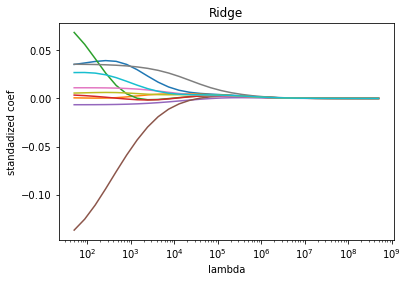

In [22]:
%%time
%matplotlib inline
ax = plt.gca() # Get the current Axes instance
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('lambda') 
plt.ylabel('standadized coef') 
plt.title('Ridge')
plt.savefig('ridge.png')

In [23]:
alphas = 10**np.linspace(-5,0,30)*0.5

In [24]:
%%time
# sometimes this cell takes a long time
lasso = Lasso(max_iter=10000) 
coefs = [] 
for a in alphas: 
    lasso.set_params(alpha=a) 
    lasso.fit(X_trn,Y_trn.values.ravel()) 
    coefs.append(lasso.coef_) 
# print('Shape:',np.shape(coefs)
print('Selected Features:', list(vars.columns[np.where(lasso.coef_!=0)[0]]))

Selected Features: []
CPU times: total: 23.2 s
Wall time: 1.95 s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


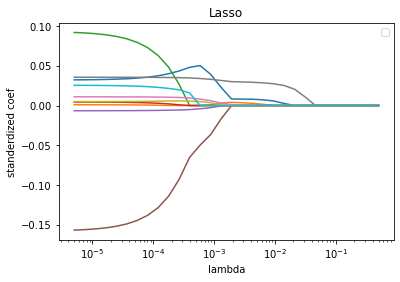

In [25]:
%matplotlib inline
ax = plt.gca() # Get the current Axes instance 
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('standerdized coef') 
plt.title('Lasso')
plt.legend()
plt.savefig('lasso.png')

## Look at PCA

In [26]:
len(X_trntst.columns)

10

In [27]:
X_trntst_save = X_trntst.copy()

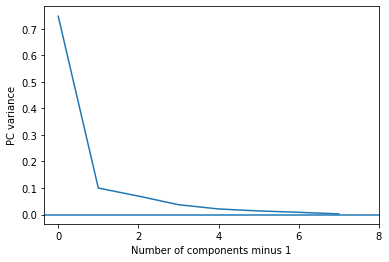

In [28]:
pca = PCA(n_components = .999, svd_solver = 'full')
pca.fit(X_trntst)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components minus 1')
plt.ylabel('PC variance')
plt.xticks(np.arange(0, len(X_trntst.columns), step=2))
plt.axhline(y=0,xmin=0,xmax=len(X_trntst.columns))
X_trntst = X_trntst_save.copy()

In [29]:
# We look at the above picture, select how many PCs we want to keep, and then redo the PCA with just this many PCs
pca = PCA(n_components = 6, svd_solver = 'full')
princ_comps = pca.fit_transform(X_trntst)
X_trntst_pca = pd.DataFrame(princ_comps, columns = ['PC' + str(i) for i in range(1, pca.n_components_+1)])
X_trntst_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.964564,0.772817,0.110634,-0.020030,-0.052818,0.033077
1,-0.930209,0.750772,0.126577,-0.022887,-0.052684,0.036006
2,-0.748459,0.634149,0.210922,-0.038001,-0.051974,0.051496
3,-0.964361,0.772709,0.110303,-0.020050,-0.052424,0.032734
4,-0.962142,0.773612,0.109869,-0.019573,-0.052228,0.033036


In [30]:
princ_comps = pca.transform(X_oot)
X_oot_orig_pca = pd.DataFrame(princ_comps, columns = ['PC' + str(i) for i in range(1, pca.n_components_+1)],index=X_oot.index)
X_oot_orig_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
84300,-0.413891,0.183458,0.844977,-0.248317,0.159353,-0.295099
84301,-0.475367,-0.057129,-0.413135,0.055155,-0.118949,-0.042502
84302,1.931720,-1.132051,0.634175,-0.248662,0.588616,-0.323386
84303,-0.227897,-0.119400,-0.678450,0.007399,0.305816,-0.366362
84304,-0.128498,0.293994,0.383999,-0.077416,0.102343,0.158576


In [31]:
X_trntst.describe()

,card_zip_total_14,card_zip3_max_30,card_zip_total_3,Merchnum_desc_total_0,zip3_max_3,Card_Merchnum_desc_total_1,zip3_total_1,Cardnum_total_0,card_zip3_max_3,card_merch_total_7
count,84300.000000,84300.000000,84300.000000,84300.000000,84300.000000,84300.000000,84300.000000,84300.000000,84300.000000,84300.000000
mean,0.002181,0.002981,0.002282,0.005054,0.012961,0.002713,0.011997,0.004657,0.002613,0.002753
std,1.055618,1.010112,1.058309,1.054543,1.022882,1.061390,1.046489,1.058445,1.015189,1.058169
min,-0.192659,-0.520380,-0.157894,-0.261731,-0.749992,-0.147791,-0.504732,-0.216129,-0.445525,-0.167984
25%,-0.172360,-0.461673,-0.143778,-0.238870,-0.551656,-0.136819,-0.428766,-0.198938,-0.405174,-0.152146
50%,-0.131064,-0.297251,-0.112548,-0.184622,-0.213235,-0.107886,-0.270048,-0.152311,-0.283180,-0.118765
75%,-0.021087,0.116925,-0.020963,-0.008151,0.374840,-0.021767,0.128474,-0.016435,0.041415,-0.021954
max,73.043311,41.617542,75.241226,76.330245,26.029193,76.333551,56.385985,63.401894,46.119230,74.556909


In [32]:
X_oot_orig_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6
count,12097.000000,12097.000000,12097.000000,12097.000000,12097.000000,12097.000000
mean,-0.113935,0.080423,0.070122,-0.025149,-0.017545,0.007411
std,1.386818,0.873525,0.764353,0.271384,0.315381,0.305173
min,-0.965540,-25.991479,-8.807104,-5.400084,-6.547771,-5.852930
25%,-0.738282,-0.219795,-0.230138,-0.071582,-0.100066,-0.046251
50%,-0.454676,0.240698,0.099412,-0.020789,-0.050257,0.037389
75%,0.054495,0.566723,0.300303,0.036835,0.037477,0.094049
max,45.010007,2.648402,18.101702,5.736601,2.531619,7.687790


In [33]:
# zscale the PCs
mean = X_trntst_pca.mean()
stdev = X_trntst_pca.std()
X_trntst_pca = (X_trntst_pca - mean)/stdev
X_oot_orig_pca = (X_oot_orig_pca - mean)/stdev

In [34]:
X_trntst_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6
count,8.430000e+04,8.430000e+04,8.430000e+04,8.430000e+04,8.430000e+04,8.430000e+04
mean,2.816542e-16,5.425474e-16,-2.858344e-16,-8.198793e-17,2.551577e-16,-1.954137e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.393565e-01,-3.512309e+01,-2.091734e+01,-3.006865e+01,-2.351658e+01,-2.795332e+01
25%,-2.620604e-01,-3.112355e-01,-3.210277e-01,-1.077249e-01,-2.368452e-01,-1.644409e-01
50%,-1.540089e-01,1.868724e-01,6.009313e-02,-2.837469e-02,-1.041279e-01,8.880716e-02
75%,4.982509e-02,5.422025e-01,3.204896e-01,6.476098e-02,1.087149e-01,2.485991e-01
max,6.566781e+01,3.804815e+01,3.049279e+01,7.132648e+01,4.055827e+01,3.161695e+01


In [35]:
X_oot_orig_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6
count,12097.000000,12097.000000,12097.000000,12097.000000,12097.000000,12097.000000
mean,-0.039901,0.077076,0.080525,-0.039564,-0.036720,0.019259
std,0.485669,0.837166,0.877746,0.426929,0.660068,0.793049
min,-0.338136,-24.909640,-10.113646,-8.495160,-13.703967,-15.209924
25%,-0.258549,-0.210647,-0.264279,-0.112609,-0.209430,-0.120191
50%,-0.159229,0.230680,0.114160,-0.032704,-0.105184,0.097162
75%,0.019084,0.543135,0.344854,0.057947,0.078437,0.244403
max,15.762678,2.538169,20.787108,9.024553,5.298478,19.978147


In [36]:
X_trntst_pca.shape

(84300, 6)

In [37]:
X_oot_orig_pca.shape

(12097, 6)

## Subsample the larger class if desired

In [38]:
# set the ratio of goods to bads that you would like. This next line is the ratio of goods to bads that you want for modeling
sample_ratio_desired = 1

temp = X_trntst.copy()
temp['Fraud'] = Y_trntst['Fraud']
temp.head()
goods = temp[temp['Fraud']==0]
bads = temp[temp['Fraud']==1]
actual_bad_fraction = len(bads)/len(temp)
actual_good_fraction = 1 - actual_bad_fraction
print(actual_bad_fraction)
fraction = sample_ratio_desired * actual_bad_fraction
goods_sampled = goods.sample(frac = fraction)
all_sampled = pd.concat([goods_sampled,bads])
all_sampled.sort_index(inplace=True)
Y_trntst_sampled = pd.DataFrame(all_sampled['Fraud'])
X_trntst_sampled = all_sampled.drop(columns=['Fraud'])
del [temp,goods,bads,all_sampled]
gc.collect()
print(X_trntst_sampled.shape,len(Y_trntst_sampled))

0.01043890865954923
(1751, 10) 1751


In [39]:
niter = 0
nitermax = 10
X_oot_orig = X_oot.copy()
pd.options.mode.chained_assignment = None  # default='warn'

## Models

In [40]:
Modeling_output = pd.DataFrame(columns=['Model','Trn','Tst','OOT'],index=range(1000))
counter = 0
model_counter = 0

In [41]:
%%time
# Logistic regression

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = LogisticRegression(max_iter=50, penalty = 'l2', C = 1, solver = 'liblinear')
 
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['log reg',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.6293823038397329 0.6797153024911032 0.29608938547486036
1 0.6462035541195477 0.6513409961685823 0.35195530726256985
2 0.6521739130434783 0.6525096525096525 0.31843575418994413
3 0.6751188589540412 0.6184738955823293 0.3743016759776536
4 0.653968253968254 0.632 0.3687150837988827
5 0.654485049833887 0.6402877697841727 0.3128491620111732
6 0.6526655896607432 0.6360153256704981 0.36312849162011174
7 0.6463022508038585 0.6744186046511628 0.37988826815642457
8 0.6547231270358306 0.6278195488721805 0.33519553072625696
9 0.6457055214723927 0.6622807017543859 0.39106145251396646
trn    0.651073
tst    0.647486
oot    0.349162
dtype: float64
CPU times: total: 906 ms
Wall time: 908 ms


In [42]:
%%time
# Single DT

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = DecisionTreeClassifier(max_depth=10,min_samples_split=200,min_samples_leaf=50, max_features = 10)
 
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['DT',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1

print(FDR3.mean())
model_counter = model_counter + 1

0 0.7845394736842105 0.7794117647058824 0.5810055865921788
1 0.7691029900332226 0.7769784172661871 0.5754189944134078
2 0.8063492063492064 0.72 0.5698324022346368
3 0.7884615384615384 0.73046875 0.5642458100558659
4 0.7928902627511591 0.7939914163090128 0.5642458100558659
5 0.7868589743589743 0.75390625 0.547486033519553
6 0.8016129032258065 0.7615384615384615 0.5754189944134078
7 0.7747899159663866 0.7543859649122807 0.5586592178770949
8 0.7881219903691814 0.7626459143968871 0.5698324022346368
9 0.8048780487804879 0.7283018867924528 0.5698324022346368
trn    0.789761
tst    0.756163
oot    0.567598
dtype: float64
CPU times: total: 4.53 s
Wall time: 4.53 s


In [43]:
%%time
# RF

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = RandomForestClassifier(n_estimators=20,max_depth=8,min_samples_split=50,min_samples_leaf=20,max_features=10)
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['RF',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.8061749571183533 0.7845117845117845 0.5810055865921788
1 0.7895595432300163 0.7752808988764045 0.5642458100558659
2 0.8122923588039868 0.762589928057554 0.5418994413407822
3 0.7925117004680188 0.7782426778242678 0.547486033519553
4 0.8039538714991763 0.7985347985347986 0.5754189944134078
5 0.792063492063492 0.796 0.5642458100558659
6 0.8015873015873016 0.788 0.5698324022346368
7 0.787828947368421 0.7941176470588235 0.553072625698324
8 0.8123980424143556 0.7752808988764045 0.547486033519553
9 0.8163606010016694 0.8042704626334519 0.5642458100558659
trn    0.801473
tst    0.785683
oot    0.560894
dtype: float64
CPU times: total: 45.5 s
Wall time: 45.5 s


In [44]:
%%time
# LGBM

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = lgb.LGBMClassifier(n_estimators=100, num_leaves=20, max_depth = 3, learning_rate = 0.03)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['LGBM',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.8313856427378965 0.7900355871886121 0.5027932960893855
1 0.8224755700325733 0.7857142857142857 0.5307262569832403
2 0.8327974276527331 0.7984496124031008 0.5251396648044693
3 0.8317152103559871 0.8129770992366412 0.5251396648044693
4 0.8254486133768353 0.8014981273408239 0.5307262569832403
5 0.8306962025316456 0.7701612903225806 0.547486033519553
6 0.8346709470304976 0.8093385214007782 0.547486033519553
7 0.8341384863123994 0.749034749034749 0.547486033519553
8 0.8174474959612278 0.7739463601532567 0.5307262569832403
9 0.8289036544850499 0.8129496402877698 0.5195530726256983
trn    0.828968
tst    0.790411
oot    0.530726
dtype: float64
CPU times: total: 31.7 s
Wall time: 1.35 s


In [45]:
%%time
# NN

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = MLPClassifier(hidden_layer_sizes=(5, 5, 5), activation = 'relu', alpha = 0.0001, learning_rate = 'adaptive',
                         solver = 'adam', learning_rate_init = 0.01)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['NN',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.7695852534562212 0.7510917030567685 0.4748603351955307
1 0.7904599659284497 0.757679180887372 0.5754189944134078
2 0.7629382303839732 0.7473309608540926 0.441340782122905
3 0.7779605263157895 0.7279411764705882 0.49162011173184356
4 0.7821316614420063 0.7024793388429752 0.5027932960893855
5 0.7559429477020603 0.7590361445783133 0.5083798882681564
6 0.754071661237785 0.7593984962406015 0.6312849162011173
7 0.7672131147540984 0.725925925925926 0.4860335195530726
8 0.768976897689769 0.7956204379562044 0.5251396648044693
9 0.7884297520661157 0.7418181818181818 0.5418994413407822
trn    0.771771
tst    0.746832
oot    0.517877
dtype: float64
CPU times: total: 9min 24s
Wall time: 47.1 s


In [48]:
%%time
# Catboost

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = CatBoostClassifier(verbose = 0, max_depth=12, iterations=20, learning_rate = 0.1, l2_leaf_reg = 0.0001)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['cat boost',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.7920133111480865 0.7383512544802867 0.547486033519553
1 0.7948717948717948 0.78515625 0.5195530726256983
2 0.8090614886731392 0.7480916030534351 0.5586592178770949
3 0.7941653160453809 0.7946768060836502 0.5307262569832403
4 0.7896440129449838 0.7786259541984732 0.5195530726256983
5 0.785234899328859 0.7711267605633803 0.4972067039106145
6 0.8149300155520995 0.7510548523206751 0.5418994413407822
7 0.7984251968503937 0.7755102040816326 0.5363128491620112
8 0.7806873977086743 0.7657992565055762 0.5363128491620112
9 0.79050736497545 0.7732342007434945 0.4972067039106145
trn    0.794954
tst    0.768163
oot    0.528492
dtype: float64
CPU times: total: 6min 1s
Wall time: 38.5 s


## Model comparison plots

In [55]:
df = Modeling_output.dropna()
df.head(20)

,Model,Trn,Tst,OOT
0,log reg,0.629382,0.679715,0.296089
1,log reg,0.646204,0.651341,0.351955
2,log reg,0.652174,0.65251,0.318436
3,log reg,0.675119,0.618474,0.374302
4,log reg,0.653968,0.632,0.368715
5,log reg,0.654485,0.640288,0.312849
6,log reg,0.652666,0.636015,0.363128
7,log reg,0.646302,0.674419,0.379888
8,log reg,0.654723,0.62782,0.335196
9,log reg,0.645706,0.662281,0.391061


In [56]:
df.shape

(60, 4)

In [57]:
df_unpivot = df.melt( id_vars='Model', value_vars=['Trn','Tst','OOT'], var_name=['Type'], value_name='Value')
df_unpivot.head()

,Model,Type,Value
0,log reg,Trn,0.629382
1,log reg,Trn,0.646204
2,log reg,Trn,0.652174
3,log reg,Trn,0.675119
4,log reg,Trn,0.653968


In [58]:
df_compare = df_unpivot[(df_unpivot['Type']=='Trn') | (df_unpivot['Type']=='Tst') | (df_unpivot['Type']=='OOT')]
df_compare.head()

,Model,Type,Value
0,log reg,Trn,0.629382
1,log reg,Trn,0.646204
2,log reg,Trn,0.652174
3,log reg,Trn,0.675119
4,log reg,Trn,0.653968


In [59]:
output = df.groupby('Model').agg({'Trn':['mean','std'],'Tst':['mean','std'],'OOT':['mean','std']})
output

Trn                 Tst                 OOT          
               mean       std      mean       std      mean       std
Model                                                                
DT         0.789761  0.012224  0.756163  0.024102  0.567598  0.009568
LGBM       0.828968  0.005553  0.790411  0.021025  0.530726  0.014182
NN         0.771771  0.012683  0.746832  0.024965  0.517877  0.054295
RF         0.801473  0.010452  0.785683  0.012910  0.560894  0.012955
cat boost  0.794954  0.010357  0.768163  0.017574  0.528492  0.020263
log reg    0.651073  0.011358  0.647486  0.020207  0.349162  0.031957

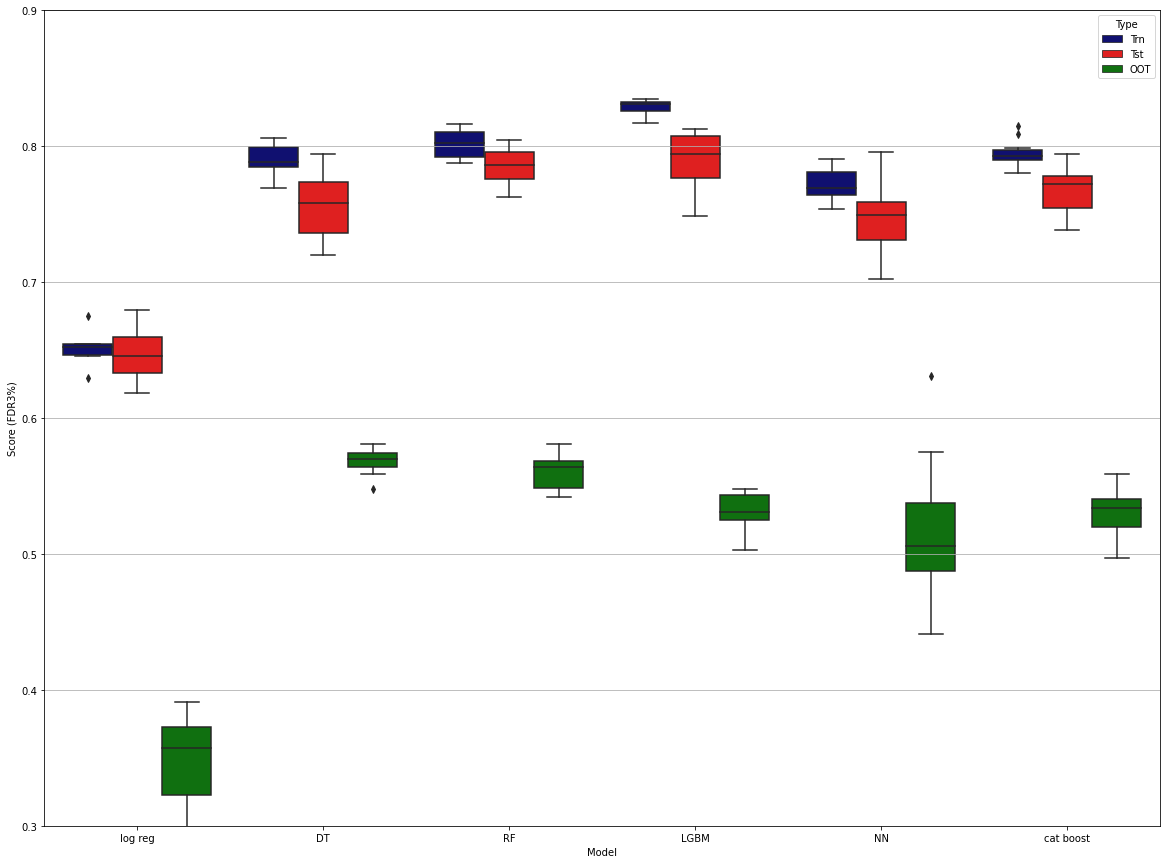

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
ax = sns.boxplot(x='Model',y='Value',hue='Type', data=df_compare, palette=['navy','r','g'])

plt.ylim(0.3,.9)
plt.ylabel('Score (FDR3%)')
plt.grid(axis='y')
plt.savefig('modeling.png')
plt.show()

In [61]:
print('duration: ', datetime.now() - start_time)

duration:  0:02:24.226886


In [62]:
# training = []
# testing = []
# oot = []
# results = pd.DataFrame(np.zeros((niter,3)),columns=['trn','tst','oot'])
# for i in range(1,8,1):
#     for niter in range(nitermax):
#         X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)
#         model = lgb.LGBMClassifier(n_estimators=200, num_leaves=8, max_depth = i, learning_rate = 0.1)
        
# #         model = MLPClassifier(hidden_layer_sizes=i*2, alpha = 0.00001, learning_rate_init = .01)
# #         model = RandomForestClassifier(n_estimators=20,max_depth=i*2,min_samples_split=30,min_samples_leaf=20,max_features=10)
# #         model = DecisionTreeClassifier(max_depth=i*2,min_samples_split=20,min_samples_leaf=5, max_features = 5)
        
#         model.fit(X_trn, Y_trn.values.ravel()) 

#         X_oot = X_oot_orig.copy()
#         X_trn_save = X_trn.copy()
#         Y_trn_save = Y_trn.copy()
    
#         predictions = model.predict_proba(X_trn_save)[:,1]
#         X_trn['predicted'] = predictions
#         X_trn['Fraud'] = Y_trn_save['Fraud']
#         topRows = int(round(X_trn.shape[0]*0.03))
#         temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
#         needed = temp.loc[:,'Fraud']
#         results.loc[niter,'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

#         predictions = model.predict_proba(X_tst)[:,1]
#         X_tst['predicted']=predictions
#         X_tst['Fraud'] = Y_tst['Fraud']
#         topRows = int(round(X_tst.shape[0]*0.03))
#         temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
#         needed = temp.loc[:,'Fraud']
#         results.loc[niter,'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

#         predictions = model.predict_proba(X_oot)[:,1]
#         X_oot['predicted']=predictions
#         X_oot['Fraud'] = Y_oot['Fraud']
#         topRows = int(round(X_oot.shape[0]*0.03))
#         temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
#         needed = temp.loc[:,'Fraud']
#         results.loc[niter,'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
#         print(niter, results.loc[niter,'trn'],results.loc[niter,'tst'],results.loc[niter,'oot'],)

#     results_mean_trn = results['trn'].mean()
#     results_mean_tst = results['tst'].mean()
#     results_mean_oot = results['oot'].mean()
#     print('loop', 'trn', 'tst', 'oot', i, results_mean_trn, results_mean_tst, results_mean_oot)
#     training.append(results_mean_trn)
#     testing.append(results_mean_tst)
#     oot.append(results_mean_oot)

# table=pd.DataFrame({'n': range(1,len(training)+1),'training':training,'testing':testing,'oot':oot})
# table.set_index('n',inplace=True) 
# table.plot()
# # plt.savefig('complexity_YOUR MODEL NAME.pdf', format='pdf')
# plt.show()


In [73]:
%%time

for niter in range(30):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

# put final model of choice
    model = RandomForestClassifier(n_estimators=20,max_depth=8,min_samples_split=50,min_samples_leaf=20,max_features=10)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['LGBM',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    if(FDR3.loc[niter, 'oot'] >= .509): break
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.7993630573248408 0.8015873015873016 0.5698324022346368
trn    0.795689
tst    0.774486
oot    0.530726
dtype: float64
CPU times: total: 4.55 s
Wall time: 4.55 s


In [74]:
X_trn_eval = X_trn.copy()
X_tst_eval = X_tst.copy()
X_oot_eval = X_oot.copy()

In [75]:
cols = ['bin','#recs','#g','#b','%g','%b','tot','cg','cb','%cg','FDR','KS','FPR']
FDR_trn = pd.DataFrame(np.zeros((101, 13)), columns = cols)
FDR_tst = pd.DataFrame(np.zeros((101, 13)), columns = cols)
FDR_oot = pd.DataFrame(np.zeros((101, 13)), columns = cols)
trn_sorted = X_trn_eval.sort_values('predicted',ascending=False)
tst_sorted = X_tst_eval.sort_values('predicted',ascending=False)
oot_sorted = X_oot_eval.sort_values('predicted',ascending=False)
bad_tot_trn = sum(X_trn_eval.loc[:, 'Fraud'])
bad_tot_tst = sum(X_tst_eval.loc[:, 'Fraud'])
bad_tot_oot = sum(X_oot_eval.loc[:, 'Fraud'])
num_tot_trn = len(X_trn_eval)
num_tot_tst = len(X_tst_eval)
num_tot_oot = len(X_oot_eval)
good_tot_trn = num_tot_trn - bad_tot_trn
good_tot_tst = num_tot_tst - bad_tot_tst
good_tot_oot = num_tot_oot - bad_tot_oot
oot_sorted.head(20)

,card_zip_total_14,card_zip3_max_30,card_zip_total_3,Merchnum_desc_total_0,zip3_max_3,Card_Merchnum_desc_total_1,zip3_total_1,Cardnum_total_0,card_zip3_max_3,card_merch_total_7,predicted,Fraud
89117,6.403438,2.664042,6.633029,0.827141,1.273749,5.425936,4.583282,1.231150,3.073440,6.562214,0.947206,1
89114,6.304671,2.664042,6.531345,0.681496,1.273749,5.322793,4.507097,1.110638,3.073440,6.461439,0.947206,1
89128,6.991946,2.664042,7.238920,1.694977,1.273749,6.040524,5.037239,1.949226,3.073440,7.162687,0.947206,1
89121,6.879966,2.664042,7.123633,1.529848,1.273749,5.923582,4.950861,1.812593,3.073440,7.048431,0.947206,1
89120,6.488149,2.664042,6.720243,0.952060,1.273749,5.514402,4.648626,1.334512,3.073440,6.648648,0.947206,1
89082,5.264274,2.664042,5.460219,-0.192464,1.273749,4.703868,3.704569,-0.158815,3.073440,5.399891,0.944187,1
89083,5.355532,2.664042,5.554172,-0.057892,1.273749,4.799169,3.774962,-0.047466,3.073440,5.493004,0.944187,1
89074,4.975602,2.664042,5.163020,6.333869,1.273749,4.523111,3.599630,6.089991,3.073440,5.105349,0.847333,1
89077,5.217299,2.664042,5.411856,6.519837,1.273749,4.654811,3.786068,6.384901,3.073440,5.351961,0.847333,1
89091,5.691619,2.664042,5.900186,0.233871,1.273749,0.929570,4.034209,0.362615,3.073440,5.835924,0.813411,1


In [76]:
for i in range(101):
    percent_rows_trn = int(round(X_trn_eval.shape[0]*0.01*i))
    percent_rows_tst = int(round(X_tst_eval.shape[0]*0.01*i))
    percent_rows_oot = int(round(X_oot_eval.shape[0]*0.01*i))
    temp_trn = trn_sorted.head(percent_rows_trn)
    temp_tst = tst_sorted.head(percent_rows_tst)
    temp_oot = oot_sorted.head(percent_rows_oot)
    num_bad_trn = sum(temp_trn.loc[:,'Fraud'])
    num_bad_tst = sum(temp_tst.loc[:,'Fraud'])
    num_bad_oot = sum(temp_oot.loc[:,'Fraud'])
    num_tot_trn = len(temp_trn)
    num_tot_tst = len(temp_tst)
    num_tot_oot = len(temp_oot)
    num_good_trn = num_tot_trn - num_bad_trn
    num_good_tst = num_tot_tst - num_bad_tst
    num_good_oot = num_tot_oot - num_bad_oot
    
    FDR_trn.loc[i, 'bin'] = i
    FDR_trn.loc[i,'#recs'] = 0
    FDR_trn.loc[i, 'tot'] = num_tot_trn
    FDR_trn.loc[i, 'cg'] = num_good_trn
    FDR_trn.loc[i, 'cb'] = num_bad_trn
    FDR_tst.loc[i, 'bin'] = i
    FDR_tst.loc[i, 'tot'] = num_tot_tst
    FDR_tst.loc[i, 'cg'] = num_good_tst
    FDR_tst.loc[i, 'cb'] = num_bad_tst
    FDR_oot.loc[i, 'bin'] = i
    FDR_oot.loc[i, 'tot'] = num_tot_oot
    FDR_oot.loc[i, 'cg'] = num_good_oot
    FDR_oot.loc[i, 'cb'] = num_bad_oot
    if i != 0:
        FDR_trn.loc[i, '#g'] = num_good_trn - FDR_trn.loc[i-1, 'cg']
        FDR_trn.loc[i, '#b'] = num_bad_trn - FDR_trn.loc[i-1, 'cb']
        FDR_trn.loc[i,'#recs'] = FDR_trn.loc[i, '#g'] + FDR_trn.loc[i, '#b']
        FDR_trn.loc[i, '%g'] = 100* (num_good_trn - FDR_trn.loc[i-1, 'cg']) / (num_tot_trn - FDR_trn.loc[i-1, 'tot'])
        FDR_trn.loc[i, '%b'] = 100 - FDR_trn.loc[i, '%g']
        FDR_trn.loc[i, '%cg'] = 100 * num_good_trn / good_tot_trn
        FDR_trn.loc[i, 'FDR'] = 100 * num_bad_trn / bad_tot_trn
        FDR_trn.loc[i, 'KS'] = FDR_trn.loc[i, 'FDR'] - FDR_trn.loc[i, '%cg']
        FDR_trn.loc[i, 'FPR'] = num_good_trn / num_bad_trn
        FDR_tst.loc[i, '#g'] = num_good_tst - FDR_tst.loc[i-1, 'cg']
        FDR_tst.loc[i, '#b'] = num_bad_tst - FDR_tst.loc[i-1, 'cb']
        FDR_tst.loc[i,'#recs'] = FDR_tst.loc[i, '#g'] + FDR_tst.loc[i, '#b']
        FDR_tst.loc[i, '%g'] = 100* (num_good_tst - FDR_tst.loc[i-1, 'cg']) / (num_tot_tst - FDR_tst.loc[i-1, 'tot'])
        FDR_tst.loc[i, '%b'] = 100 - FDR_tst.loc[i, '%g']
        FDR_tst.loc[i, '%cg'] = 100 * num_good_tst / good_tot_tst
        FDR_tst.loc[i, 'FDR'] = 100 * num_bad_tst / bad_tot_tst
        FDR_tst.loc[i, 'KS'] = FDR_tst.loc[i, 'FDR'] - FDR_tst.loc[i, '%cg']
        FDR_tst.loc[i, 'FPR'] = num_good_tst / num_bad_tst
        FDR_oot.loc[i, '#g'] = num_good_oot - FDR_oot.loc[i-1, 'cg']
        FDR_oot.loc[i, '#b'] = num_bad_oot - FDR_oot.loc[i-1, 'cb']
        FDR_oot.loc[i,'#recs'] = FDR_oot.loc[i, '#g'] + FDR_oot.loc[i, '#b']
        FDR_oot.loc[i, '%g'] = 100* (num_good_oot - FDR_oot.loc[i-1, 'cg']) / (num_tot_oot - FDR_oot.loc[i-1, 'tot'])
        FDR_oot.loc[i, '%b'] = 100 - FDR_oot.loc[i, '%g']
        FDR_oot.loc[i, '%cg'] = 100 * num_good_oot / good_tot_oot
        FDR_oot.loc[i, 'FDR'] = 100 * num_bad_oot / bad_tot_oot
        FDR_oot.loc[i, 'KS'] = FDR_oot.loc[i, 'FDR'] - FDR_oot.loc[i, '%cg']
        FDR_oot.loc[i, 'FPR'] = num_good_oot / num_bad_oot

FDR_oot

,bin,#recs,#g,#b,%g,%b,tot,cg,cb,%cg,FDR,KS,FPR
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,1.0,121.0,54.0,67.0,44.628099,55.371901,121.0,54.0,67.0,0.453096,37.430168,36.977071,0.805970
2,2.0,121.0,94.0,27.0,77.685950,22.314050,242.0,148.0,94.0,1.241819,52.513966,51.272147,1.574468
3,3.0,121.0,113.0,8.0,93.388430,6.611570,363.0,261.0,102.0,2.189965,56.983240,54.793275,2.558824
4,4.0,121.0,116.0,5.0,95.867769,4.132231,484.0,377.0,107.0,3.163282,59.776536,56.613254,3.523364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96.0,121.0,120.0,1.0,99.173554,0.826446,11613.0,11439.0,174.0,95.980869,97.206704,1.225835,65.741379
97,97.0,121.0,121.0,0.0,100.000000,0.000000,11734.0,11560.0,174.0,96.996140,97.206704,0.210564,66.436782
98,98.0,121.0,118.0,3.0,97.520661,2.479339,11855.0,11678.0,177.0,97.986239,98.882682,0.896442,65.977401
99,99.0,121.0,121.0,0.0,100.000000,0.000000,11976.0,11799.0,177.0,99.001510,98.882682,-0.118829,66.661017


In [77]:
FDR3.to_csv('FDR3.csv')

In [78]:
FDR_trn.to_csv('FDR_trn.csv', index=False)
FDR_tst.to_csv('FDR_tst.csv', index=False)
FDR_oot.to_csv('FDR_oot.csv', index=False)

In [79]:
FDR_oot = pd.read_csv('FDR_oot.csv')

Max possible savings: 21,348,000.0


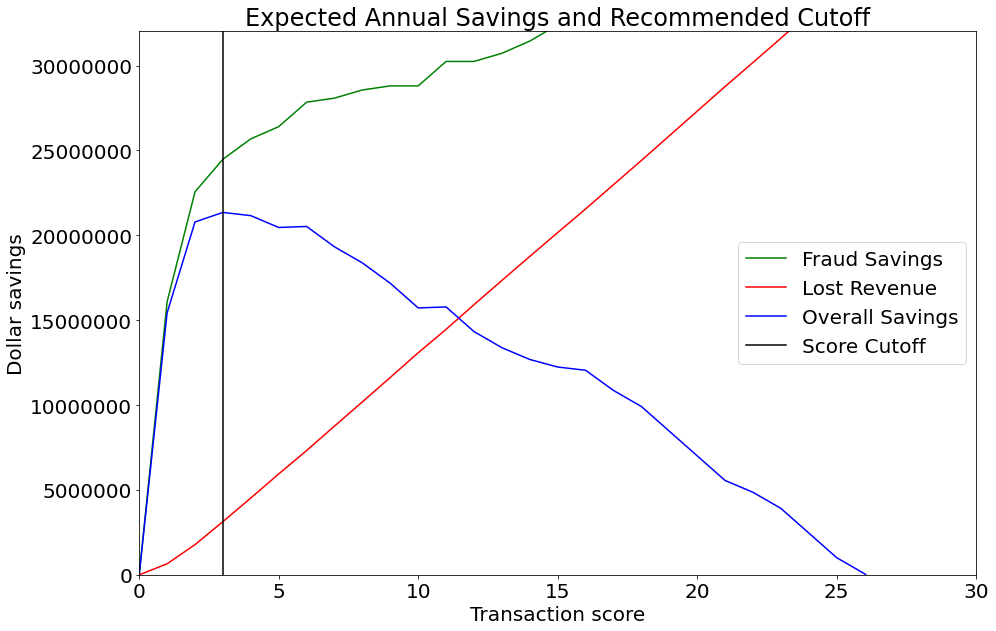

In [80]:
cost_fraud = 400
cost_fp = 20
# xmult: oot is only 2 out of 12 months, and 100,000 sample transactions out of 10 million/year
xoot = 12/2 * 10000000/100000
Financials_oot = pd.DataFrame(np.zeros((101, 3)), columns = ['Fraud Savings','FP Loss','Overall Savings'])
for i in range(101):
    Financials_oot.loc[i, 'Fraud Savings'] = FDR_oot.loc[i, 'cb'] * cost_fraud * xoot
    Financials_oot.loc[i, 'FP Loss'] = FDR_oot.loc[i, 'cg'] * cost_fp * xoot
    Financials_oot.loc[i, 'Overall Savings'] = Financials_oot.loc[i, 'Fraud Savings'] - Financials_oot.loc[i, 'FP Loss']

max_savings = Financials_oot['Overall Savings'].max(0)
print('Max possible savings: '+'{:,}'.format(max_savings))
yupper = max_savings * 1.5
plt.rcParams.update({'font.size':20})
plt.figure(figsize=(15,10))
plt.plot(Financials_oot['Fraud Savings'], color='green')
plt.plot(Financials_oot['FP Loss'], color='red')
plt.plot(Financials_oot['Overall Savings'], color='blue')
plt.axvline(x=3, color = 'black')
plt.xlim(0,30)
plt.ylim(0,yupper)
plt.xlabel('Transaction score')
plt.ylabel('Dollar savings')
plt.legend(labels = ['Fraud Savings', 'Lost Revenue', 'Overall Savings', 'Score Cutoff'])
plt.title('Expected Annual Savings and Recommended Cutoff')
plt.ticklabel_format(style='plain')
plt.savefig('savings.png', format='png')

In [81]:
print("duration: ", datetime.now() - start_time)

duration:  0:07:09.900535
